In [2]:
import os
print("Working Directory:", os.getcwd())

Working Directory: D:\SLIIT\pr


In [3]:
import pathlib

data_dir = pathlib.Path("cats_and_dogs_filtered")
train_dir = data_dir / "train"
validation_dir = data_dir / "validation"


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
cat = train_dir / "cats"

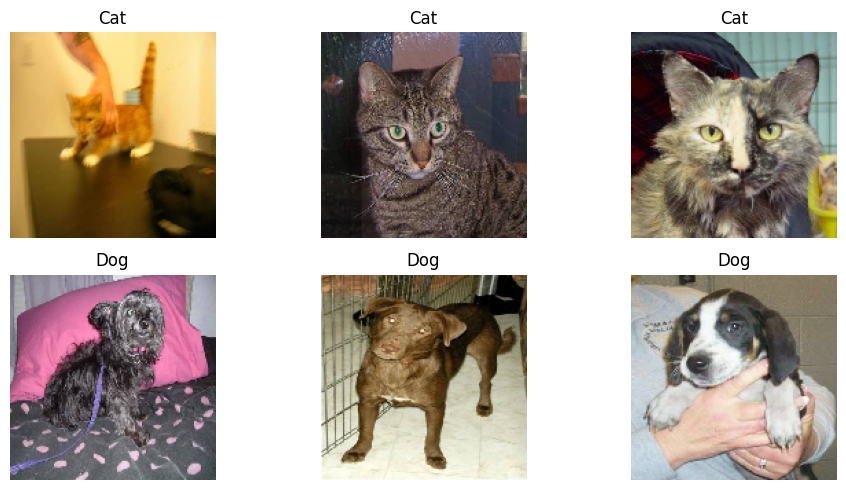

In [6]:
# Show some training images
cat_path = train_dir / "cats"
dog_path = train_dir / "dogs"

plt.figure(figsize=(10,5))

for i, img_path in enumerate(list(cat_path.glob("*.jpg"))[:3] + list(dog_path.glob("*.jpg"))[:3]):
    img = load_img(img_path, target_size=(150, 150))
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Cat" if "cat" in img_path.name else "Dog")

plt.tight_layout()
plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pathlib
import os


In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

Epoch 1/10


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 57s 842ms/step - accuracy: 0.4823 - loss: 1.0051 - val_accuracy: 0.6370 - val_loss: 0.6670
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 506ms/step - accuracy: 0.5860 - loss: 0.6662 - val_accuracy: 0.6720 - val_loss: 0.6067
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 507ms/step - accuracy: 0.7016 - loss: 0.5866 - val_accuracy: 0.6960 - val_loss: 0.5723
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 504ms/step - accuracy: 0.7208 - loss: 0.5512 - val_accuracy: 0.7030 - val_loss: 0.5581
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 543ms/step - accuracy: 0.7603 - loss: 0.4903 - val_accuracy: 0.7230 - val_loss: 0.5524
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 474ms/step - accuracy: 0.8063 - loss: 0.4261 - val_accuracy: 0.7080 - val_loss: 0.5800
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 475ms/step - accuracy: 0.8405 - loss: 0.3440 - val_accuracy: 0.7330 - val_loss: 0.5803
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 459ms/step - accuracy: 0.9203 - loss: 0.2183 - val_accuracy: 0.709

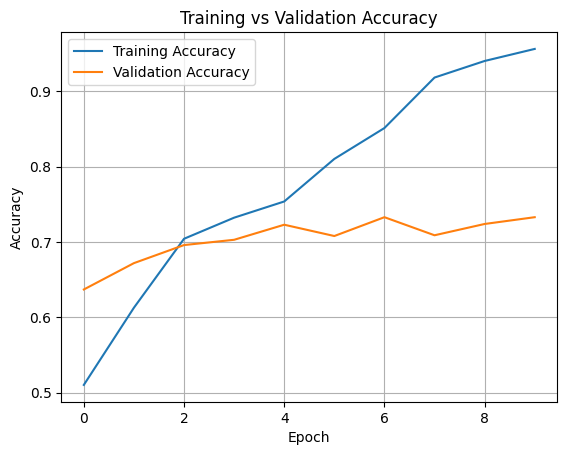

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
